# Import necessary Libararies

In [1]:
import os # Helps us work with files and directories on our computer (like loading images from folders)
import numpy as np# A go-to library for handling data in arrays and performing math operations on them
import matplotlib.pyplot as plt #for showing images
from PIL import Image  # A handy tool for opening, editing, and manipulating images (like converting to grayscale or resizing)
from sklearn.model_selection import train_test_split # Splits our data into training and testing sets so we can evaluate model performance
from google.colab import drive #for loading data from drive

# Mount the drive and specify the paths

In [2]:
dataset_path = '/content/drive/MyDrive/MammographyDataset'
#load the benign and malignant images
benign_path = os.path.join(dataset_path, 'Benign Masses')
malignant_path = os.path.join(dataset_path, 'Malignant Masses')

# Write functions to load and display some images

In [3]:
# function to display images
def display_images(images, titles, ncols=3, nrows=2):
  # use plt library functions to create a figure to display images
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
      # iterate through the images and show them with their titles
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(img)  # display the image
        plt.title(title)  # add title to each image
        plt.axis('off')  # hide the axes
    plt.tight_layout()  # ensure images are neatly arranged
    plt.show()  # show the images

# function to load images from a folder and print details
def load_and_print_details(folder_path, label, num_images=5):
  # create arrays to store images and their corresponding titles
    images = []
    titles = []
    # iterate through the files in the folder
    for i, filename in enumerate(os.listdir(folder_path)):
        if i >= num_images:  # limit to num_images
            break
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):  # ensure it's a file
            img = Image.open(file_path)  # open the image file
            images.append(img)  # add the image to the list
            titles.append(f"label: {label}, {filename}, size: {img.size}")  # add title with details
            # print details about the image
            print(f"image: {filename} | label: {label} | size: {img.size} | mode: {img.mode}")
    display_images(images, titles)  # display the images with titles


# Print the images

Benign Images (Original Form):
Image: D3_D_4022_1.RIGHT_MLO (3).png | Label: 0 | Size: (227, 227) | Mode: L
Image: D3_D_4037_1.RIGHT_MLO (4).png | Label: 0 | Size: (227, 227) | Mode: L
Image: D3_D_4037_1.RIGHT_CC (6).png | Label: 0 | Size: (227, 227) | Mode: L
Image: D3_D_4037_1.RIGHT_CC (4).png | Label: 0 | Size: (227, 227) | Mode: L
Image: D3_D_4038_1.LEFT_MLO (4).png | Label: 0 | Size: (227, 227) | Mode: L


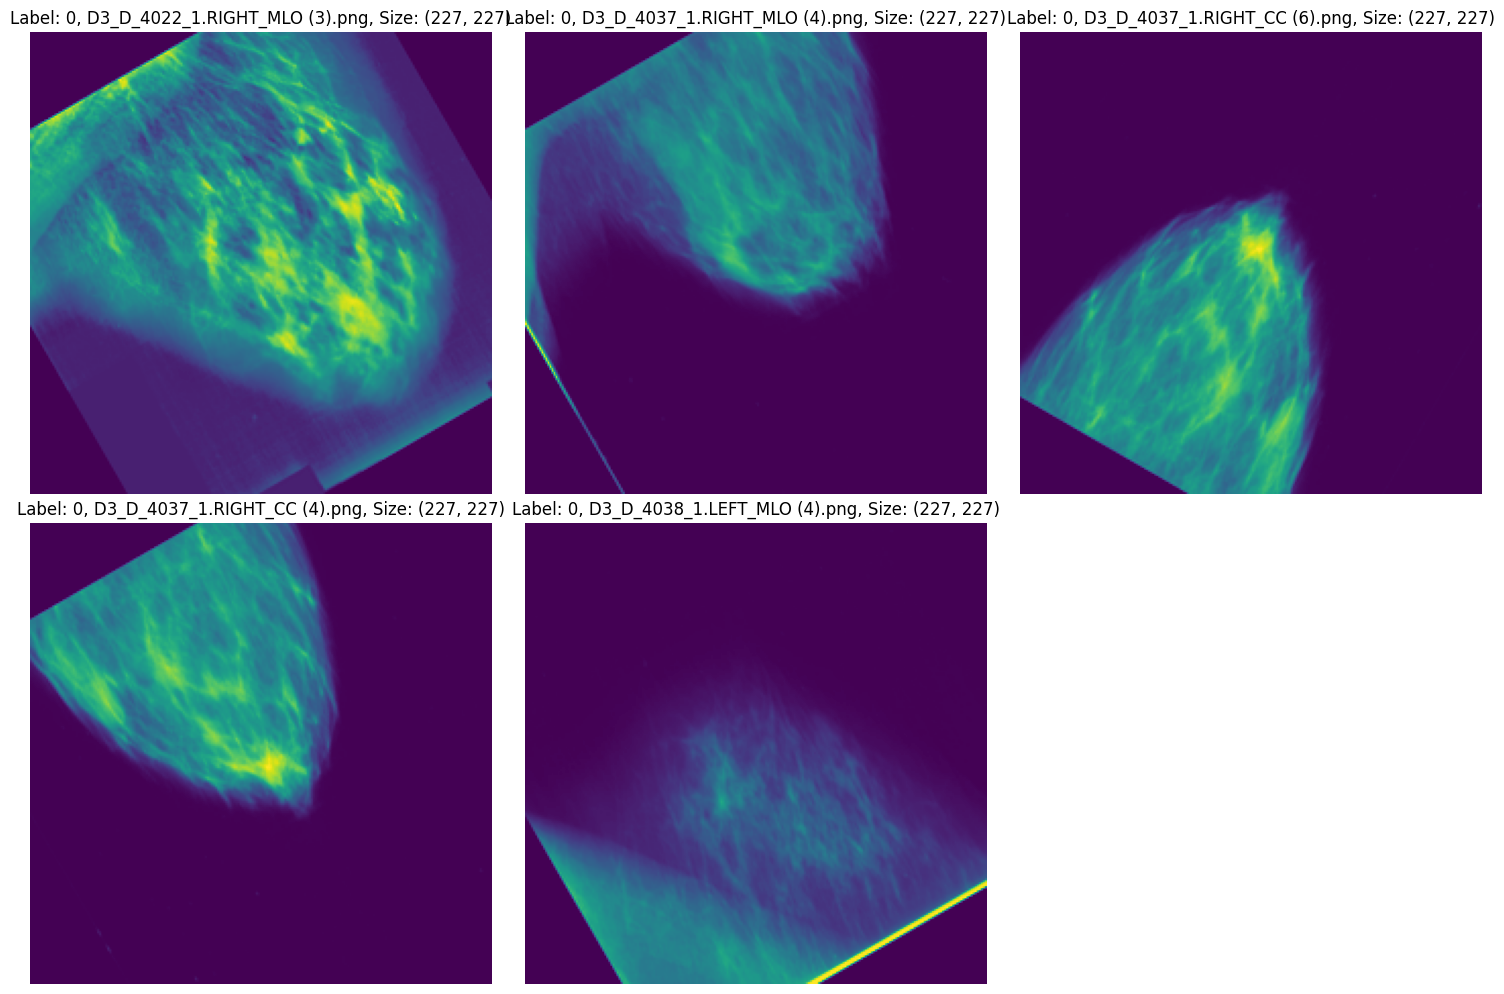


Malignant Images (Original Form):
Image: D3_C_0180_1.LEFT_MLO (3).png | Label: 1 | Size: (227, 227) | Mode: L
Image: D3_C_0194_1.RIGHT_CC (5).png | Label: 1 | Size: (227, 227) | Mode: L
Image: D3_C_0339_1.RIGHT_MLO (6).png | Label: 1 | Size: (227, 227) | Mode: L
Image: D3_C_0481_1.LEFT_MLO (5).png | Label: 1 | Size: (227, 227) | Mode: L
Image: D3_C_0339_1.RIGHT_MLO (3).png | Label: 1 | Size: (227, 227) | Mode: L


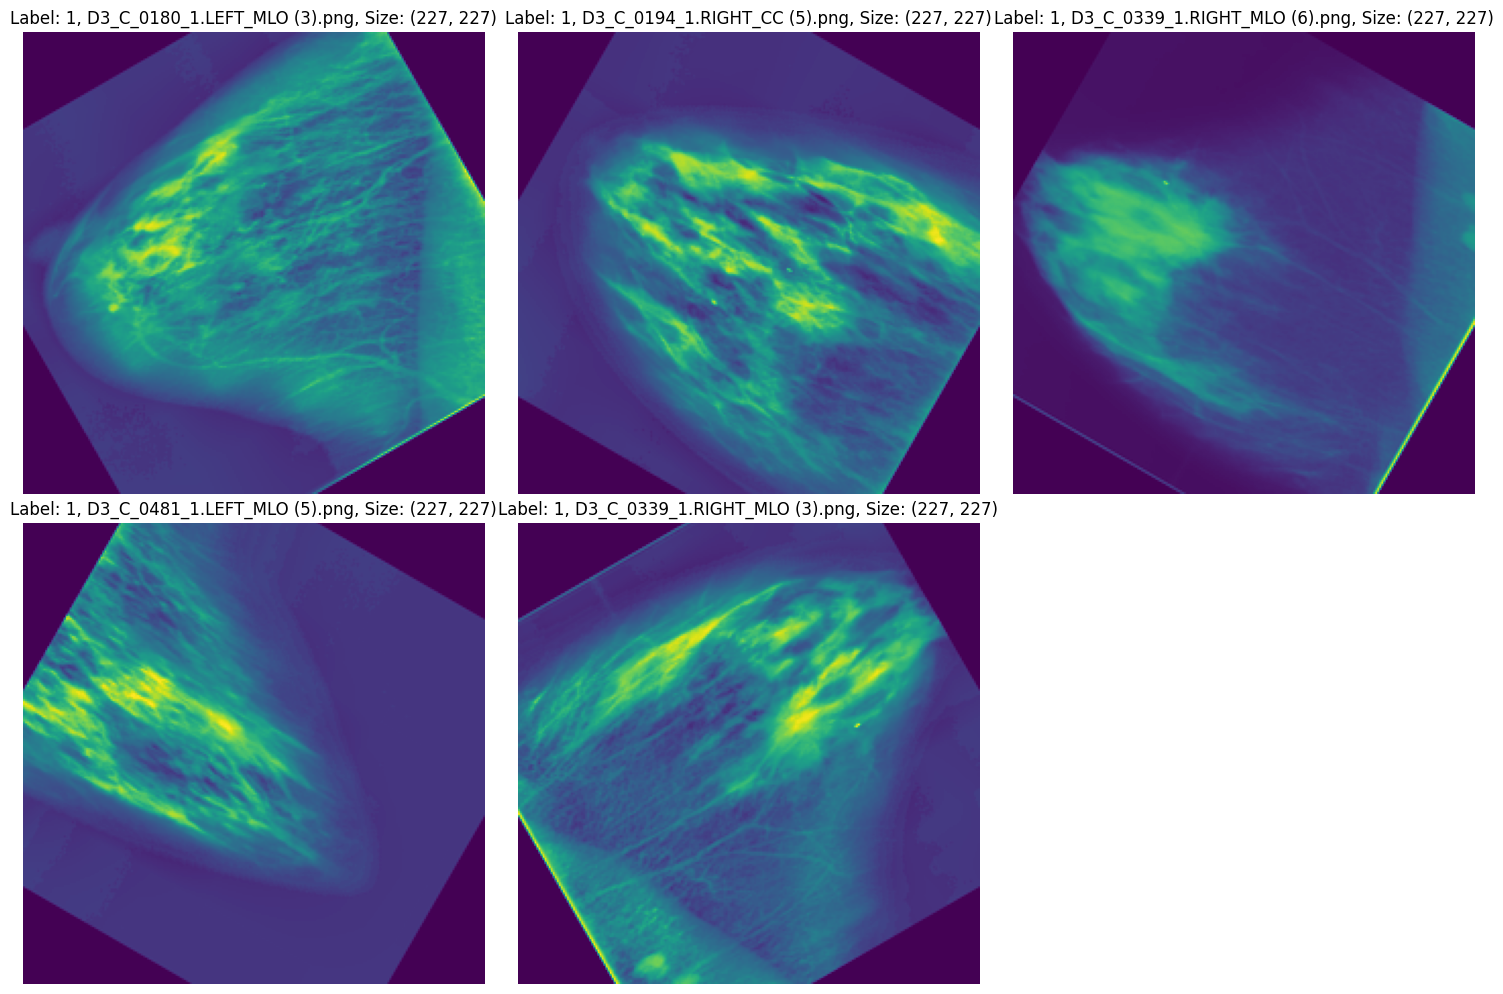

In [4]:
#load and display 5 benign and malignant images in their original form
print("Benign Images (Original Form):")
load_and_print_details(benign_path, label=0, num_images=5)

print("\nMalignant Images (Original Form):")
load_and_print_details(malignant_path, label=1, num_images=5)

# Reszie the images to 224 to be used with densenet and resnet

In [5]:
# Resize images to 224x224 as that is the size accepted by both densenet and resnet
def resize_images_and_print(images, new_size=(224, 224)):
    resized_images = [img.resize(new_size) for img in images]
    #give new titles to resized images
    resized_titles = [f"Resized {img.size}" for img in resized_images]
    #display some of the re
    display_images(resized_images, resized_titles)

# Load all the images and resize them

In [6]:
# Load images
all_benign_images = [Image.open(os.path.join(benign_path, f)) for f in os.listdir(benign_path) if os.path.isfile(os.path.join(benign_path, f))]
all_malignant_images = [Image.open(os.path.join(malignant_path, f)) for f in os.listdir(malignant_path) if os.path.isfile(os.path.join(malignant_path, f))]



Resized One Benign Image (224x224):


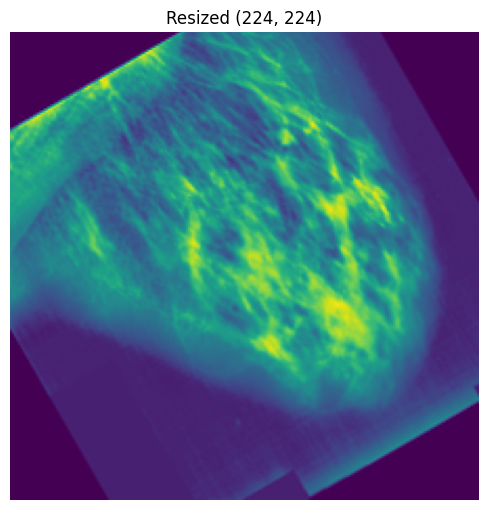


Resized One Malignant Image (224x224):


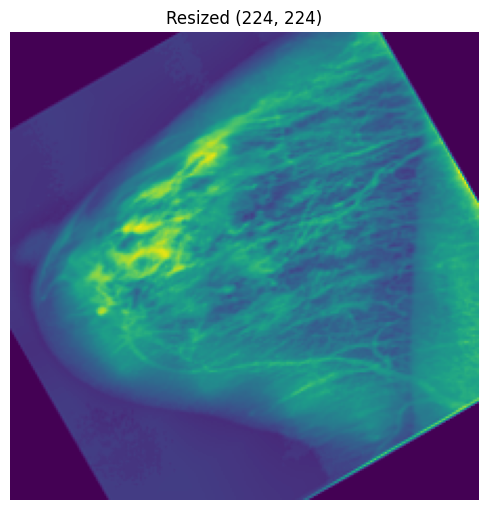

In [7]:
#resize the images
print("\nResized One Benign Image (224x224):")
resize_images_and_print([all_benign_images[0]])  # Passing only the first benign image

print("\nResized One Malignant Image (224x224):")
resize_images_and_print([all_malignant_images[0]])

# Normalize the images

In [ ]:
# Normalize pixel values
def normalize_images(images):
    # divide pixel values by 255 to scale them between 0 and 1
    return [np.array(img) / 255.0 for img in images]

# Normalize and print some images
normalized_benign_images = normalize_images(all_benign_images)  # apply normalization to benign images
normalized_malignant_images = normalize_images(all_malignant_images)  # apply normalization to malignant images

#Generate labels for images and store them as np arrays

In [1]:
# Combine images and labels
benign_labels = [0] * len(all_benign_images)
malignant_labels = [1] * len(all_malignant_images)

all_images = np.array(normalized_benign_images + normalized_malignant_images)
all_labels = np.array(benign_labels + malignant_labels)

# Print the number of benign and malignant images
print(f"\nTotal Benign Images: {len(benign_labels)}")
print(f"Total Malignant Images: {len(malignant_labels)}")


Total Benign Images: 13710
Total Malignant Images: 10866


# Split into testing, training and validation sets

In [2]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
# The first split separates 30% of the data for testing and validation
# 70% of the data will be used for training (X_train, y_train)
# X_temp and y_temp are temporary variables used for further splitting

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)
# The second split divides the remaining 30% into 2 parts:
# 33% of the 30% goes to the validation set (X_val, y_val)
# The remaining 67% of the 30% goes to the test set (X_test, y_test)

print(f"\nTraining samples: {len(X_train)}")
# Display the number of training samples
print(f"Validation samples: {len(X_val)}")
# Display the number of validation samples
print(f"Test samples: {len(X_test)}")
# Display the number of test samples




Training samples:17,201 
Validation samples:2,433
Test samples: 4,940 
